<a href="https://colab.research.google.com/github/raj245rohit/cats-vs-dogs_classification/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Datasets

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-04-02 14:40:28--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.215.125.109, 2600:1407:3c00:6a4::317f, 2600:1407:3c00:68c::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.215.125.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   186MB/s    in 4.3s    

2023-04-02 14:40:32 (185 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

Import Modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from keras.utils import load_img
warnings.filterwarnings('ignore')

Create Dataframe for input and output

In [7]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

FileNotFoundError: ignored

In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df['label'] = df['label'].astype('str')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images label
0    PetImages/Cat/313.jpg     0
1   PetImages/Dog/4295.jpg     1
2  PetImages/Dog/10251.jpg     1
3   PetImages/Cat/3243.jpg     0
4  PetImages/Dog/10269.jpg     1

In [ ]:
df = df[df['images'].str[-4:] == '.jpg']
print(len(df))


25000


In [ ]:
import PIL
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    df = df[df['images'] != image]

print(len(df))


24998


Exploratory Data Analysis

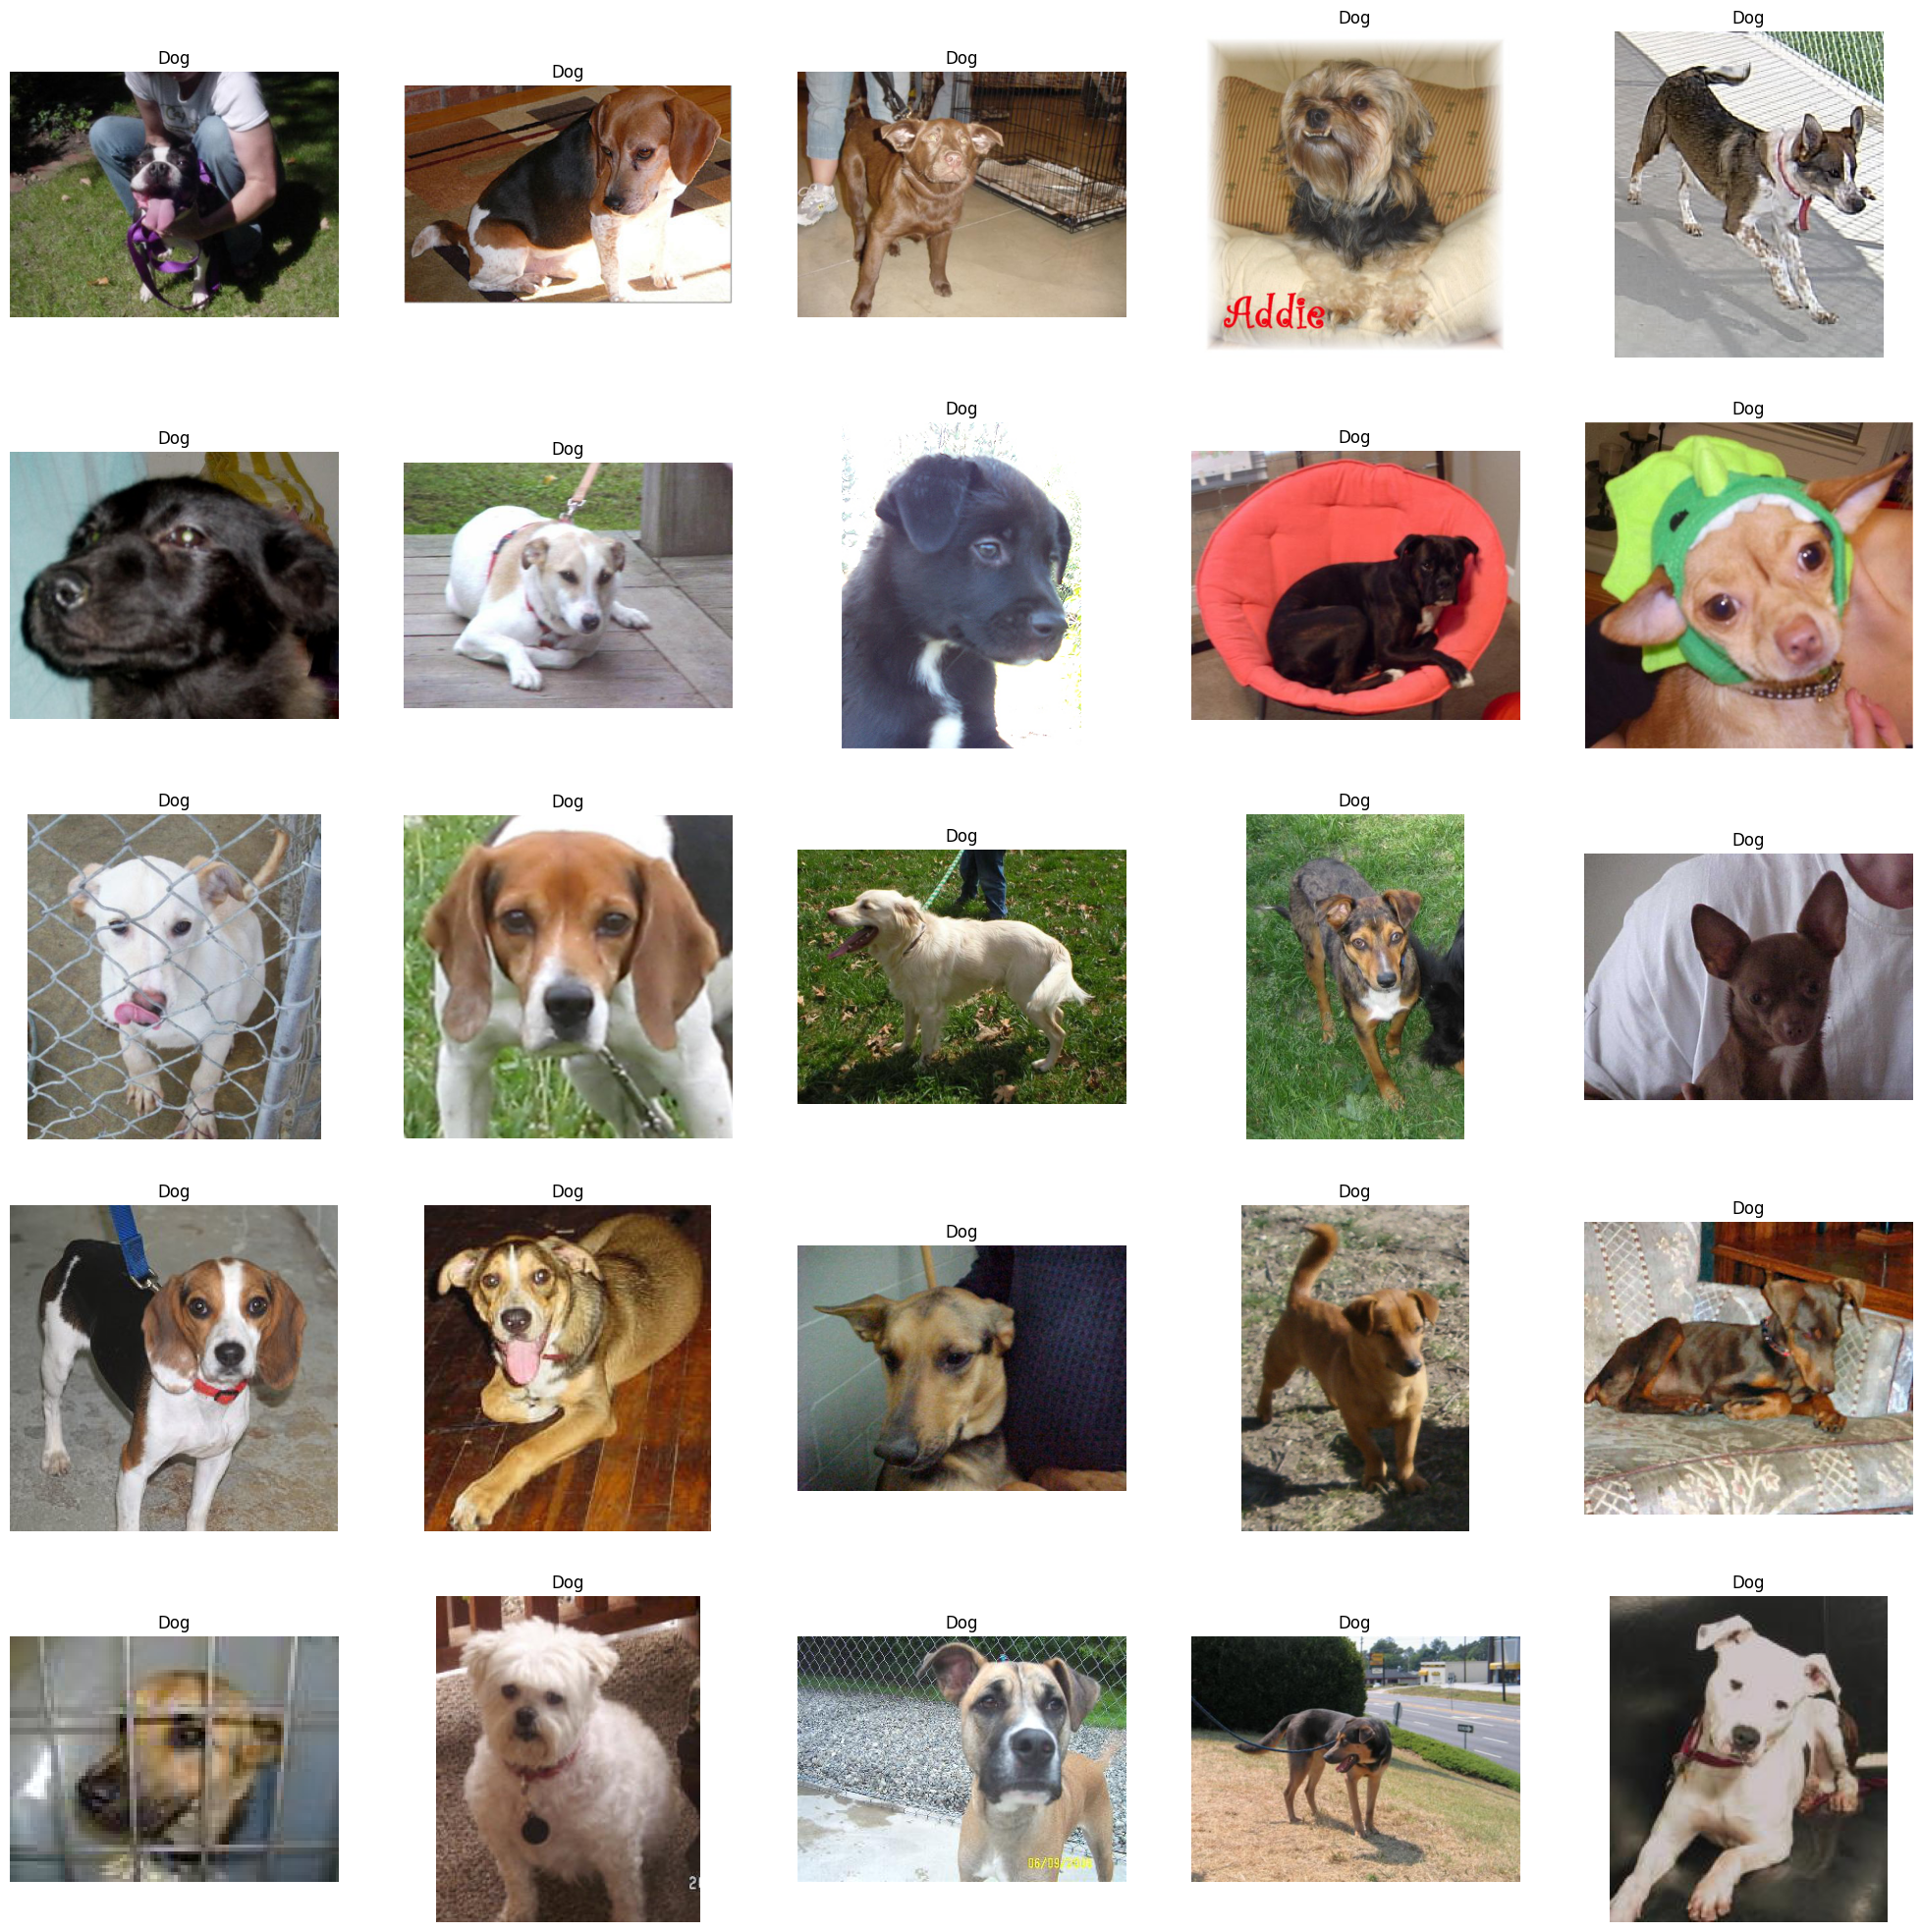

In [ ]:
import random
# Display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['image']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dog')
  plt.axis('off')

<Axes: ylabel='count'>

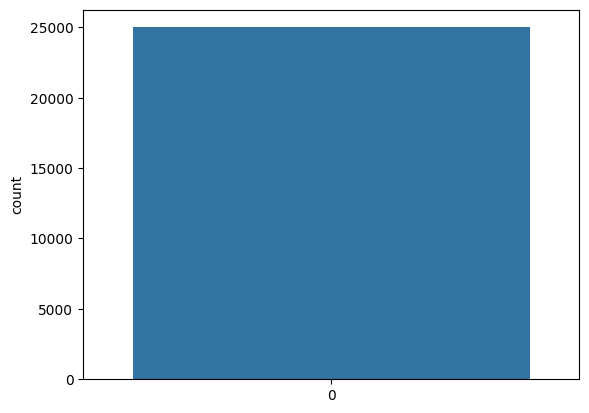

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

Create DataGenerator for Images

In [ ]:
#input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
test.head()

images label
6870    PetImages/Dog/7406.jpg     1
22914   PetImages/Dog/4502.jpg     1
9670    PetImages/Dog/4061.jpg     1
13640    PetImages/Dog/597.jpg     1
23341  PetImages/Cat/10360.jpg     0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255, #normalization of images
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator= train_generator.flow_from_dataframe(
    train,
    x_col='images', 
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images', 
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Building

In [2]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [3]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    Conv2D(64, (3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 53824)             0

In [5]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

NameError: ignored

Visualization of Results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(acc)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'validation Accuaracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss= history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', labels='Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.show()